In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Columns in measurment df
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#Columns in measurment df
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
recent_data = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_data)

('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
dates = session.query(measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date.desc()).all()
dates

# Perform a query to retrieve the data and precipitation scores
dates_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
dates_prcp


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(dates_prcp, columns = ['dates', 'precipitation'])
df.set_index('dates')


# Sort the dataframe by date
sorted_df = df.sort_values(by=['dates'])
sorted_df



,dates,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


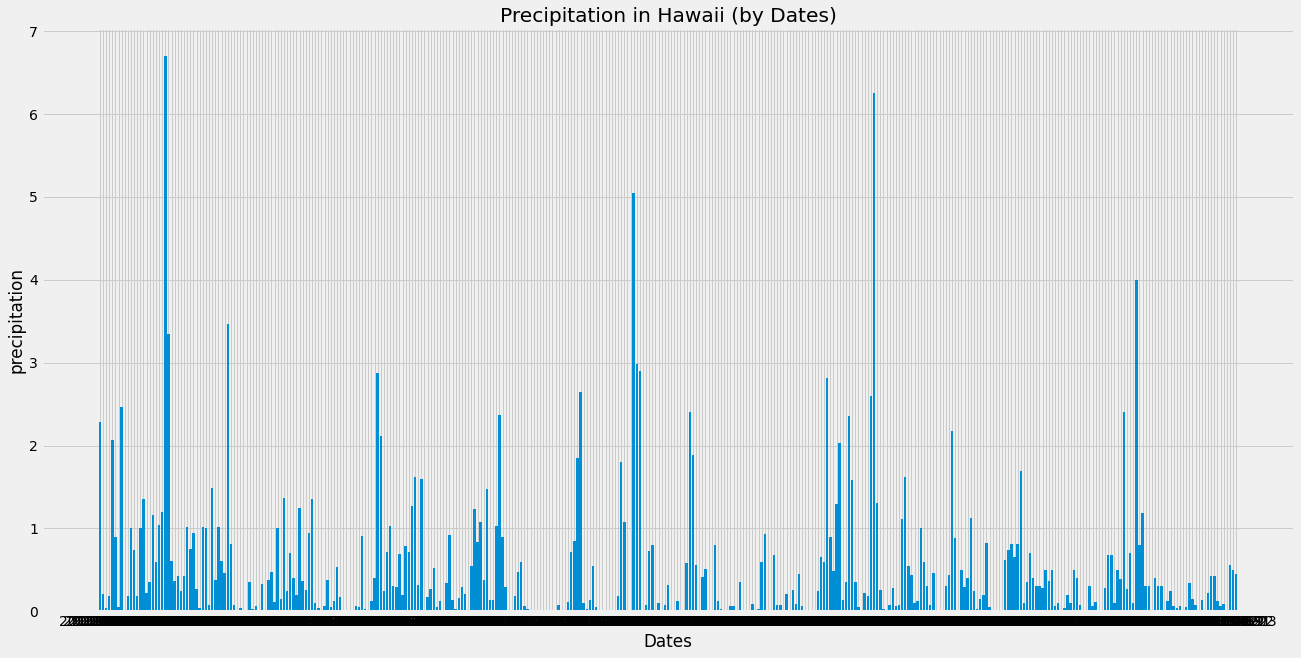

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(sorted_df['dates'], sorted_df['precipitation'])
plt.xlabel("Dates")
plt.ylabel("precipitation")
plt.title("Precipitation in Hawaii (by Dates)")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measurement.station)
stations
number_stations = stations.count()
number_stations

19550

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(measurement.date).all()
active_stations


[('USC00517948', 1372),
 ('USC00514830', 2202),
 ('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00516128', 2612),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
summary_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs),\
                      func.avg(measurement.tobs)).\
                      filter(measurement.station == 'USC00519281').all()
summary_active_station

[(54.0, 85.0, 71.66378066378067)]

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_station = session.query(measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date >'2016-08-23').all()
last_year_station

last_year_station_df = pd.DataFrame(last_year_station, columns = ['temperature'])



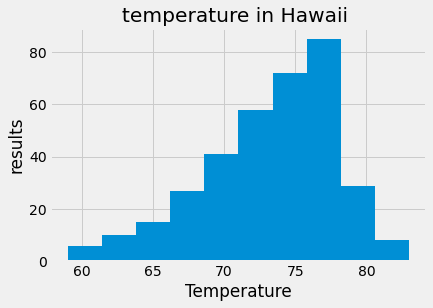

In [45]:
#plot the results as a histogram

plt.hist(last_year_station_df)
plt.xlabel("Temperature")
plt.ylabel("results")
plt.title("temperature in Hawaii ")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()